In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./monthly_milk_production.csv', parse_dates=['Date'], index_col='Date')


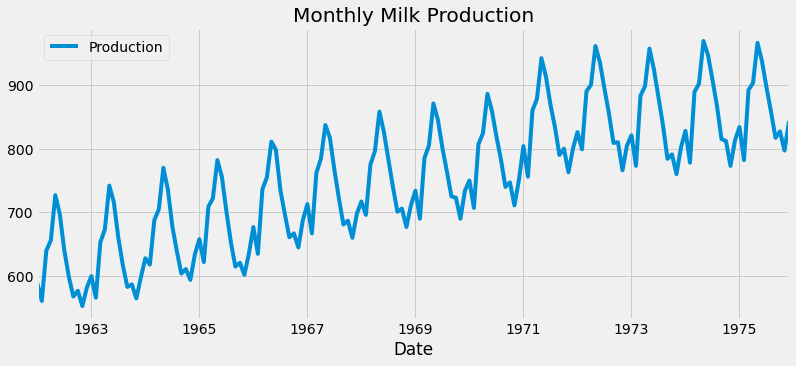

In [3]:
df.plot(figsize=(12,5))
plt.title('Monthly Milk Production')
plt.show()

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [5]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [6]:
df.shape

(168, 1)

<ipython-input-7-51b71c2674ab>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df['Production'], freq=12, model='additive')


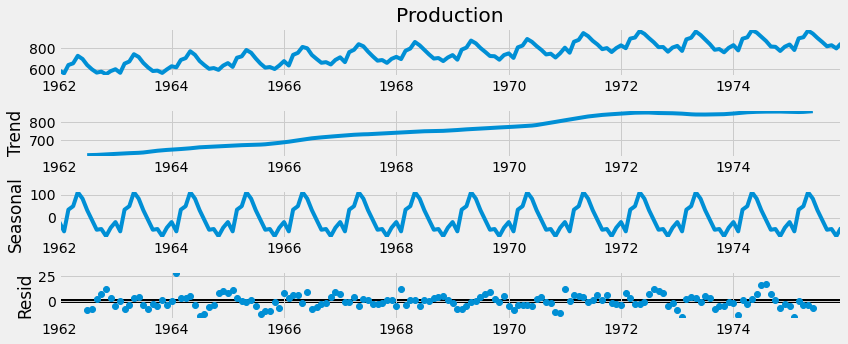

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Production'], freq=12, model='additive')
plt.rcParams['figure.figsize'] = 12, 5
decomposition.plot()
plt.show();


## Simple Moving Average

<AxesSubplot:xlabel='Date'>

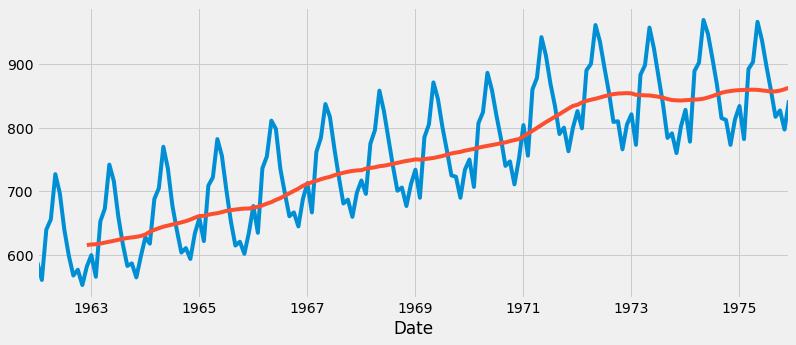

In [8]:
production_SMA= df['Production'].rolling(window=12).mean()
df["Production"].plot()
production_SMA.plot()

## Exponentially Weighted Moving Average

<AxesSubplot:xlabel='Date'>

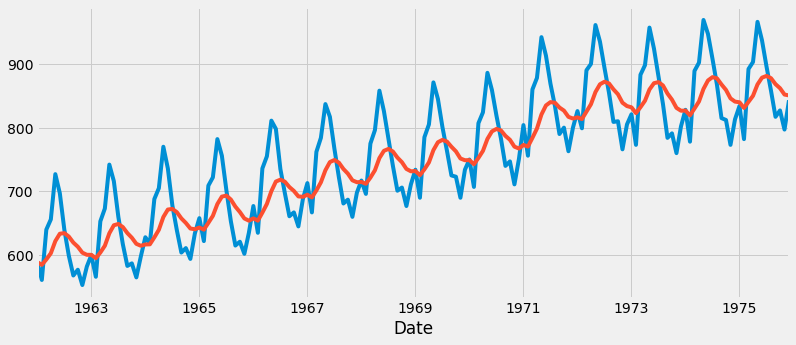

In [9]:
production_ewma= df['Production'].ewm(span=12,adjust=False).mean()
df["Production"].plot()
production_ewma.plot()

## Comparing SMA to EWMA

Text(0.5, 1.0, 'SMA vs EWMA')

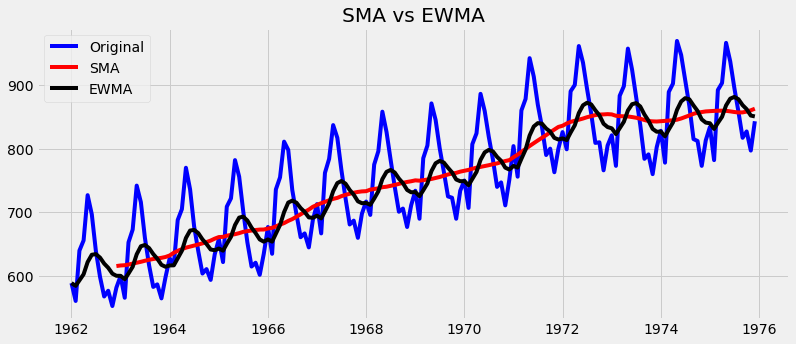

In [10]:
#Plot rolling statistics:
orig = plt.plot(df['Production'], color='blue',label='Original')
mean = plt.plot(production_SMA, color='red', label='SMA')
std = plt.plot(production_ewma, color='black', label = 'EWMA')
plt.legend(loc='best')
plt.title('SMA vs EWMA')



In [11]:
import warnings
warnings.filterwarnings("ignore")

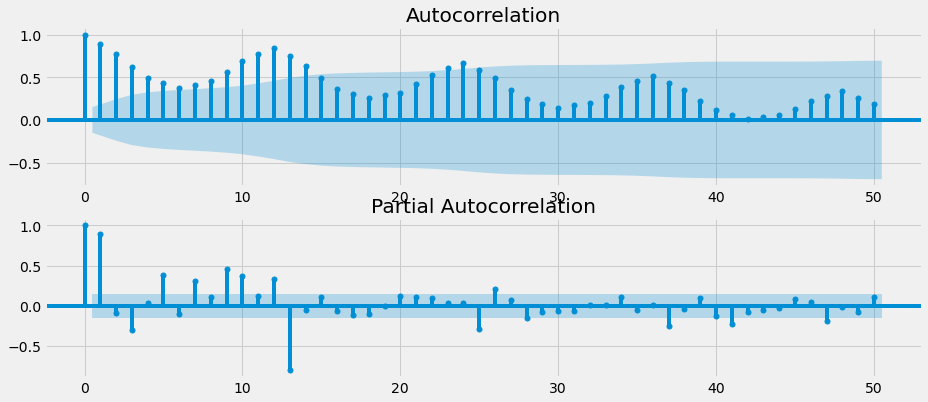

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(df, lags=50, ax=ax1)
ax2 = plot_pacf(df, lags=50, ax=ax2)
plt.show()

## Train test split

<AxesSubplot:xlabel='Date'>

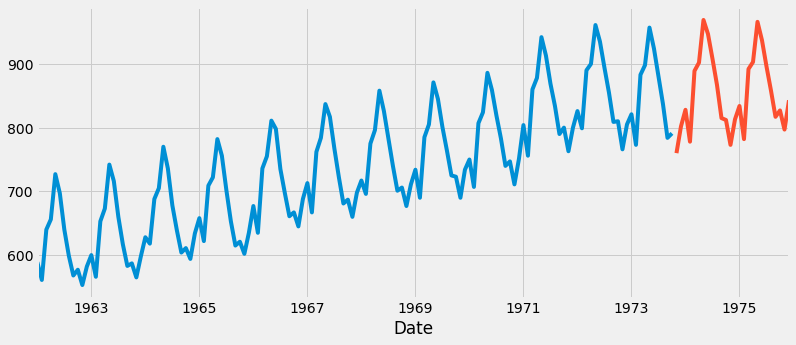

In [13]:
#divide into train and validation set
train = df[:int(0.85*(len(df)))]
test = df[int(0.85*(len(df))):]

#plotting the data
train['Production'].plot()
test['Production'].plot()

## AR

In [14]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

### Testing with lag 1

In [15]:
test_model1 = AR(train['Production'])
ARfit_1 = test_model1.fit(maxlag=1,method='mle')
print(f'Lag: {ARfit_1.k_ar}')
print(f'Coefficients:\n{ARfit_1.params}')

Lag: 1
Coefficients:
const            76.211292
L1.Production     0.895805
dtype: float64


In [16]:
AR_model = AR(train['Production'])
ARfit = AR_model.fit(maxlag=12,method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 12
Coefficients:
const             35.533693
L1.Production      0.444434
L2.Production      0.099880
L3.Production     -0.182407
L4.Production     -0.079129
L5.Production      0.142549
L6.Production     -0.080669
L7.Production      0.093363
L8.Production     -0.162498
L9.Production      0.043875
L10.Production     0.187556
L11.Production    -0.070515
L12.Production     0.515516
dtype: float64


In [17]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(12) Predictions'

predictionsAR12 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

<AxesSubplot:xlabel='Date'>

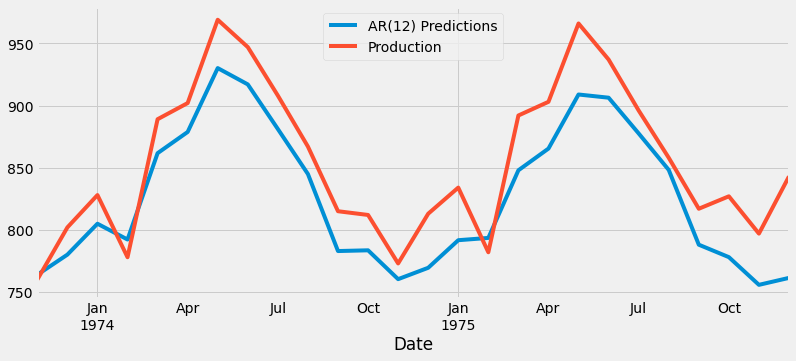

In [18]:
predictionsAR12.plot(legend=True)
test['Production'].plot(legend=True)

In [28]:
len(train)

142

In [37]:
fcast = ARfit.predict(start=len(train), end=len(df)+12, dynamic=False).rename('Forecast')
fcast

1973-11-01    763.887854
1973-12-01    780.090590
1974-01-01    804.951147
1974-02-01    792.252630
1974-03-01    861.701533
1974-04-01    878.750382
1974-05-01    930.122870
1974-06-01    917.004570
1974-07-01    881.105112
1974-08-01    844.910456
1974-09-01    782.978986
1974-10-01    783.571100
1974-11-01    760.369990
1974-12-01    769.510385
1975-01-01    791.696705
1975-02-01    793.534843
1975-03-01    847.930469
1975-04-01    865.394423
1975-05-01    908.878906
1975-06-01    906.307531
1975-07-01    877.569831
1975-08-01    848.220322
1975-09-01    788.083185
1975-10-01    778.068945
1975-11-01    755.793003
1975-12-01    761.396249
1976-01-01    781.351373
1976-02-01    789.460620
1976-03-01    836.004961
1976-04-01    854.398030
1976-05-01    891.516703
1976-06-01    895.216686
1976-07-01    872.756005
1976-08-01    848.105211
1976-09-01    793.448166
1976-10-01    775.668813
1976-11-01    752.488458
1976-12-01    754.351911
1977-01-01    772.296560
Freq: MS, Name: Forecast,

In [43]:
forecastAR = fcast.tail(12)

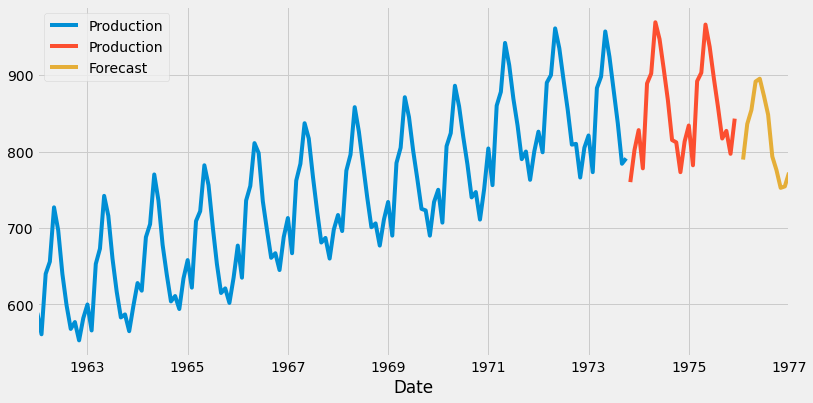

In [45]:
train["Production"].plot(legend=True)
test["Production"].plot(legend=True)
forecastAR.plot(legend=True,figsize=(12,6));

## ARMA